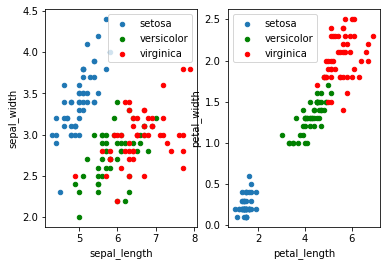

In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.metrics import precision_score, accuracy_score, recall_score
import matplotlib.pyplot as plt

csv_file = 'iris.csv'
df = pd.read_csv(csv_file)

# divide the dataset into three dataframes based on the species
setosa_df = df.query('species == "setosa"')
versicolor_df = df.query('species == "versicolor"')
virginica_df = df.query('species == "virginica"')

fig, axes = plt.subplots(nrows=1, ncols=2)

# Plot a scatter chart using x='sepal_length', y='sepal_width', and separate colors for each of the three dataframes
ax = setosa_df.plot.scatter(x='sepal_length', y='sepal_width', label='setosa', ax=axes[0])
ax = versicolor_df.plot.scatter(x='sepal_length', y='sepal_width', label='versicolor', color='green', ax=ax)
ax = virginica_df.plot.scatter(x='sepal_length', y='sepal_width', label='virginica', color='red', ax=ax)

# Plot a scatter chart using x='petal_length', y='petal_width', and separate colors for each of the three dataframes
ax = setosa_df.plot.scatter(x='petal_length', y='petal_width', label='setosa', ax=axes[1])
ax = versicolor_df.plot.scatter(x='petal_length', y='petal_width', label='versicolor', color='green', ax=ax)
ax = virginica_df.plot.scatter(x='petal_length', y='petal_width', label='virginica', color='red', ax=ax)

plt.show()


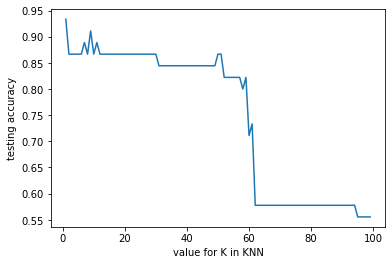

In [5]:
def load_iris(iris_path, split_percentage):
    df = pd.read_csv(iris_path)

    df = shuffle(df)
    iris_x = df.drop('species', axis=1).values
    iris_y = df['species'].values

    # Split iris data in train and test data
    # A random permutation, to split the data randomly

    split_point = int(len(iris_x) * split_percentage)
    iris_X_train = iris_x[:split_point]
    iris_y_train = iris_y[:split_point]
    iris_X_test = iris_x[split_point:]
    iris_y_test = iris_y[split_point:]

    return iris_X_train, iris_y_train, iris_X_test, iris_y_test


if __name__ == '__main__':
    csv_file = 'iris.csv'

    # Split the data into test and train parts
    iris_X_train, iris_y_train, iris_X_test, iris_y_test = load_iris(csv_file, split_percentage=0.7)

    # train a classifier
    k_range =range(1,100)
    scores_list =[]
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(iris_X_train, iris_y_train)
        # predict the test set
        predictions = knn.predict(iris_X_test)
        scores_list.append(accuracy_score(iris_y_test, predictions))
    
    plt.plot(k_range,scores_list)
    plt.xlabel('value for K in KNN')
    plt.ylabel('testing accuracy')
    #print (scores_list)

    #print("precision:\t", precision_score(iris_y_test, predictions, average=None))
    #print("recall:\t\t", recall_score(iris_y_test, predictions, average=None))
    #print("confusion_matrix:\n", confusion_matrix(iris_y_test, predictions))